# Conceptual Fréchet mean plots

In [1]:
#Modules


In [12]:
import matplotlib.pyplot as plt

# Use a built-in Matplotlib style
plt.style.use('default')  # guaranteed to exist



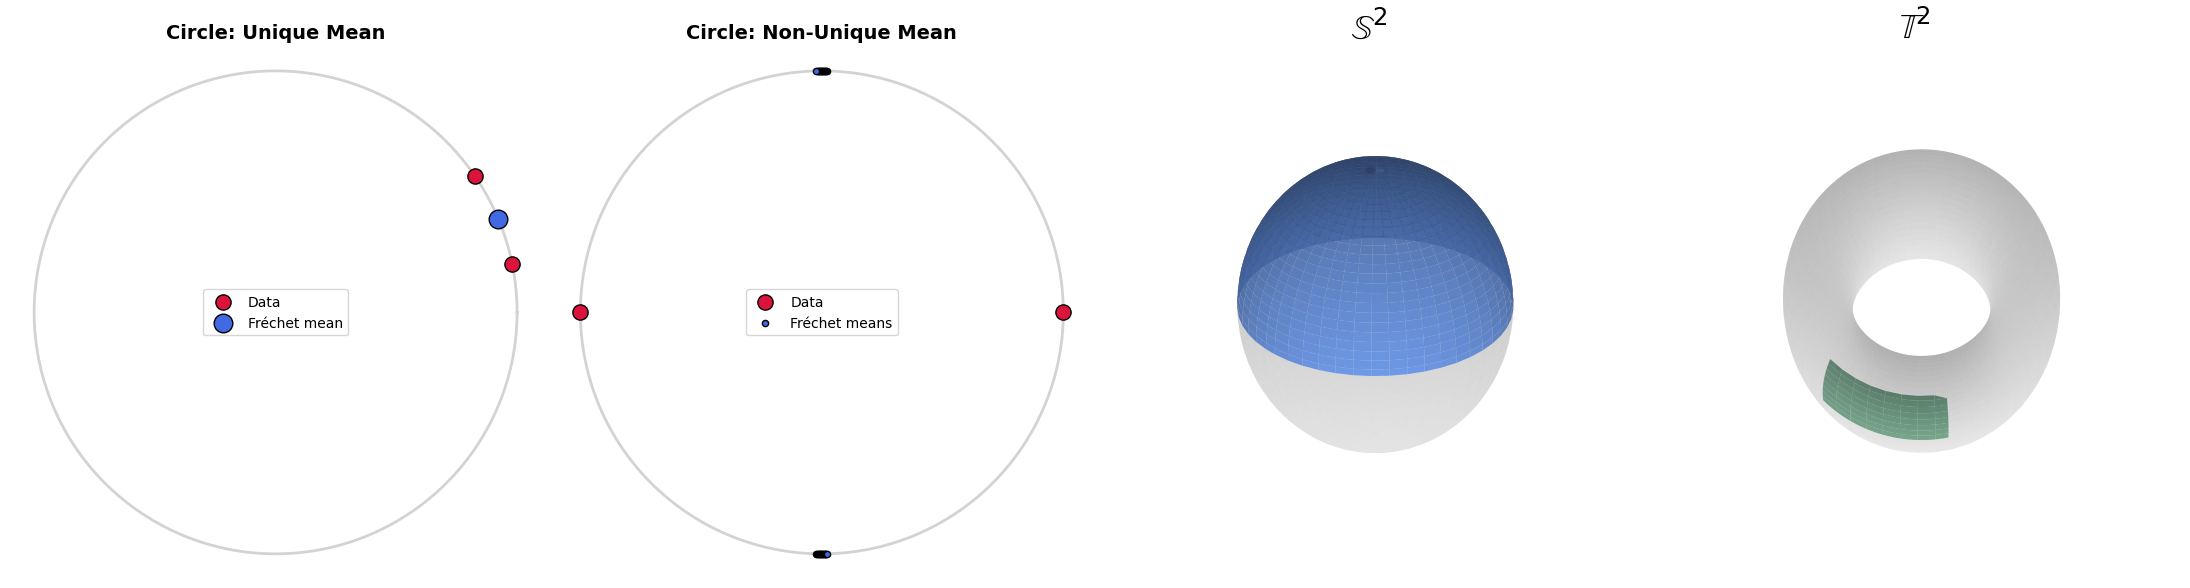

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting

# -----------------------------
# 1. Functions for circle plots
# -----------------------------
def circle_distance(theta, phi):
    diff = np.abs(theta - phi)
    return np.minimum(diff, 2*np.pi - diff)

def frechet_function(theta, data):
    return np.sum(circle_distance(theta, data)**2)

def draw_circle(ax, color='lightgray', lw=2):
    t = np.linspace(0, 2*np.pi, 400)
    ax.plot(np.cos(t), np.sin(t), color=color, linewidth=lw)

theta_grid = np.linspace(0, 2*np.pi, 2000)

# -----------------------------
# 2. Data for circle (unique mean)
# -----------------------------
data_unique = np.array([0.2, 0.4, 0.6])
F_unique = np.array([frechet_function(t, data_unique) for t in theta_grid])
mean_theta_unique = theta_grid[np.argmin(F_unique)]

# -----------------------------
# 3. Data for circle (non-unique mean)
# -----------------------------
data_nonunique = np.array([0, np.pi])
F_nonunique = np.array([frechet_function(t, data_nonunique) for t in theta_grid])
min_val = np.min(F_nonunique)
minimizers = theta_grid[np.isclose(F_nonunique, min_val, atol=1e-3)]

# -----------------------------
# 4. Sphere mesh
# -----------------------------
u = np.linspace(0, 2*np.pi, 200)
v = np.linspace(0, np.pi, 200)
U, V = np.meshgrid(u, v)
X_s = np.cos(U) * np.sin(V)
Y_s = np.sin(U) * np.sin(V)
Z_s = np.cos(V)
unique_mask_s = Z_s > 0
X_s_u, Y_s_u, Z_s_u = X_s.copy(), Y_s.copy(), Z_s.copy()
X_s_u[~unique_mask_s] = np.nan
Y_s_u[~unique_mask_s] = np.nan
Z_s_u[~unique_mask_s] = np.nan

# -----------------------------
# 5. Torus mesh
# -----------------------------
R, r = 3.0, 1.0
def torus(theta, phi):
    x = (R + r*np.cos(theta)) * np.cos(phi)
    y = (R + r*np.cos(theta)) * np.sin(phi)
    z = r * np.sin(theta)
    return x, y, z

theta = np.linspace(0, 2*np.pi, 200)
phi   = np.linspace(0, 2*np.pi, 200)
TH, PH = np.meshgrid(theta, phi)
X_t, Y_t, Z_t = torus(TH, PH)

# local uniqueness region
theta0, phi0, delta = 0.0, 0.0, 1.0 #0.6
unique_mask_t = (np.abs(TH - theta0) < delta) & (np.abs(PH - phi0) < delta)
X_t_u, Y_t_u, Z_t_u = X_t.copy(), Y_t.copy(), Z_t.copy()
X_t_u[~unique_mask_t] = np.nan
Y_t_u[~unique_mask_t] = np.nan
Z_t_u[~unique_mask_t] = np.nan

# -----------------------------
# 6. Create 1x4 figure (beautiful)
# -----------------------------
fig = plt.figure(figsize=(22,6))

# Circle unique
ax1 = fig.add_subplot(1,4,1)
draw_circle(ax1)
ax1.scatter(np.cos(data_unique), np.sin(data_unique), color='crimson', s=120, edgecolor='k', zorder=3, label='Data')
ax1.scatter(np.cos(mean_theta_unique), np.sin(mean_theta_unique), color='royalblue', s=180, edgecolor='k', zorder=4, label='Fréchet mean')
ax1.set_aspect('equal'); ax1.axis('off'); ax1.legend(frameon=True)
ax1.set_title("Circle: Unique Mean", fontsize=14, fontweight='bold')

# Circle non-unique
ax2 = fig.add_subplot(1,4,2)
draw_circle(ax2)
ax2.scatter(np.cos(data_nonunique), np.sin(data_nonunique), color='crimson', s=120, edgecolor='k', zorder=3, label='Data')
ax2.scatter(np.cos(minimizers), np.sin(minimizers), color='royalblue', s=20, edgecolor='k', zorder=4, label='Fréchet means')
ax2.set_aspect('equal'); ax2.axis('off'); ax2.legend(frameon=True)
ax2.set_title("Circle: Non-Unique Mean", fontsize=14, fontweight='bold')

# Sphere
ax3 = fig.add_subplot(1,4,3, projection='3d')
ax3.plot_surface(X_s, Y_s, Z_s, color='lightgray', alpha=0.25, rstride=4, cstride=4, linewidth=0)
ax3.plot_surface(X_s_u, Y_s_u, Z_s_u, color='cornflowerblue', alpha=0.9, rstride=4, cstride=4, linewidth=0)
ax3.view_init(elev=30, azim=45)
ax3.set_box_aspect([1,1,1])  # ensures sphere looks like a sphere
ax3.set_axis_off()
ax3.set_title(r"$\mathbb{S}^2$", fontsize=25)

# Torus
ax4 = fig.add_subplot(1,4,4, projection='3d')
ax4.plot_surface(X_t, Y_t, Z_t, color='lightgray', alpha=0.25, rstride=4, cstride=4, linewidth=0)
ax4.plot_surface(X_t_u, Y_t_u, Z_t_u, color='seagreen', alpha=0.9, rstride=4, cstride=4, linewidth=0)
ax4.view_init(elev=75, azim=45)  # top-down view
ax4.set_box_aspect([1,1,1])       # ensures proportions look correct
ax4.set_axis_off()
ax4.set_title(r"$\mathbb{T}^2$", fontsize=25)


plt.tight_layout()
plt.show()
